In [122]:
import os, json
import numpy as np
all_results = []
for model_id in os.listdir("hp_results"):
    result_path = os.path.join("hp_results", model_id)
    with open(result_path) as f:
        all_results.append(json.load(f))
results = all_results
len(results)

29

In [123]:
best_config = results[np.argmin([r['stats']['numWaiting'] for r in results])]['config']
best_config

{'agent': 'Q',
 'alpha': 0.373019674934715,
 'batch_size': 4,
 'epsilon': 0.6699150333551822,
 'epsilon_half_life': 166.91016768733405,
 'eta0': 8.459770378438722e-05,
 'gamma': 0.8731282768629177,
 'gui': False,
 'learning_rate': 'constant',
 'maxIter': 1000,
 'scenario': 'std_four_way',
 'stepLength': 20}

In [124]:
%matplotlib inline
import matplotlib.pyplot as plt

def scatterPlot(param, stat, results, logX=False, logY=False):
    x = [result['config'][param] for result in results]
    y = [result['stats'][stat] for result in results]
    x = addNoise(x)
    y = addNoise(y)
    fig, ax = plt.subplots()
    plt.scatter(x, y)
    if logX:
        ax.set_xscale('log')
    if logY:
        ax.set_yscale('log')
    offset = (np.max(x) - np.min(x)) * 0.02
    plt.xlabel(param)
    plt.ylabel(stat)
    plt.xlim(np.min(x) - offset, np.max(x) + offset)
    plt.gcf().set_size_inches(8,6)
    plt.show()

In [125]:
def addNoise(x):
    x = np.array(x)
    rng = np.max(x) - np.min(x)
    x = x + np.random.rand(len(x)) * rng * 0.05
    return x

In [126]:
def categoryPlot(param, stat, results):
    x = [result['config'][param] for result in results]
    categories = list(set(x))
    x = [categories.index(val) for val in x]
    
    y = [result['stats'][stat] for result in results]
    x = addNoise(x)
    y = addNoise(y)
    fig, ax = plt.subplots()
    plt.scatter(x, y)
    ax.set_xticks(range(len(categories)))
    ax.set_xticklabels(categories)
    plt.xlabel(param)
    plt.ylabel(stat)
    plt.axis()
    plt.gcf().set_size_inches(8,6)
    plt.show()

In [136]:
results = [r for r in all_results if
             ('maxMinutes' in r['config'])]
results = [r for r in results if
             r['config']['learning_rate'] != 'optimal']
results = [r for r in results if
             r['config']['eta0'] <= 1e-4]
best_config = results[np.argmin([r['stats']['numWaiting'] for r in results])]['config']
best_config

{'agent': 'Q',
 'alpha': 0.4175387370016244,
 'batch_size': 32,
 'epsilon': 0.5605281695498787,
 'epsilon_half_life': 377.0450723418279,
 'eta0': 6.933968689096447e-05,
 'gamma': 0.8403610597230723,
 'gui': False,
 'learning_rate': 'invscaling',
 'lqfProb': 0.41918338488791873,
 'maxIter': 500,
 'maxMinutes': 20.0,
 'scenario': 'two_by_two_3lane'}

In [128]:
scatterPlot('alpha', 'numWaiting', results, logX=True)

In [129]:
[r['config']['learning_rate'] for r in results]

['invscaling',
 'invscaling',
 'constant',
 'invscaling',
 'constant',
 'invscaling',
 'invscaling',
 'invscaling',
 'constant',
 'invscaling',
 'invscaling',
 'constant']

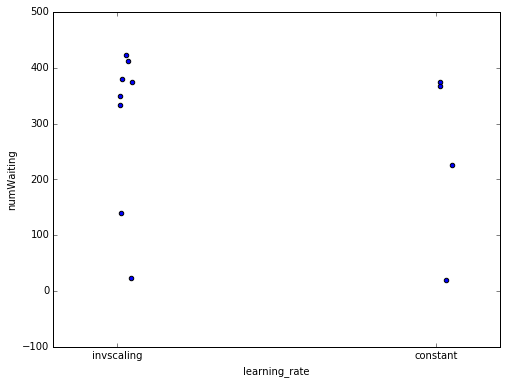

In [130]:
categoryPlot('learning_rate', 'numWaiting', results)

In [131]:
scatterPlot('gamma', 'numWaiting', results)

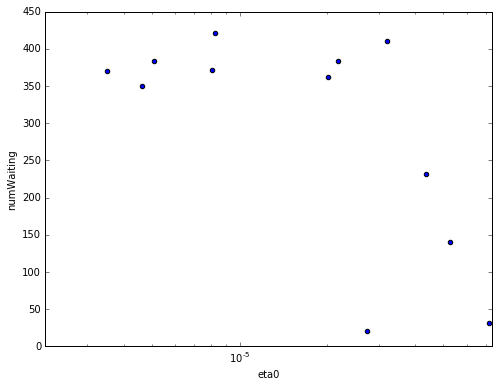

In [132]:
scatterPlot('eta0', 'numWaiting', results, logX=True)

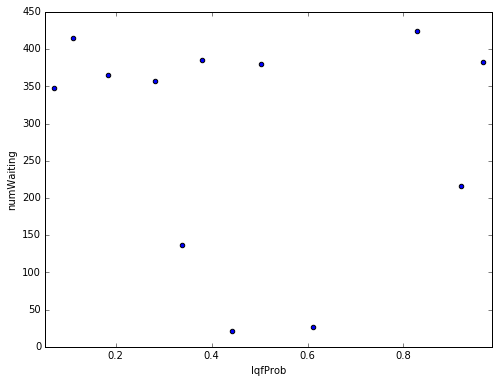

In [133]:
scatterPlot('lqfProb', 'numWaiting', results)

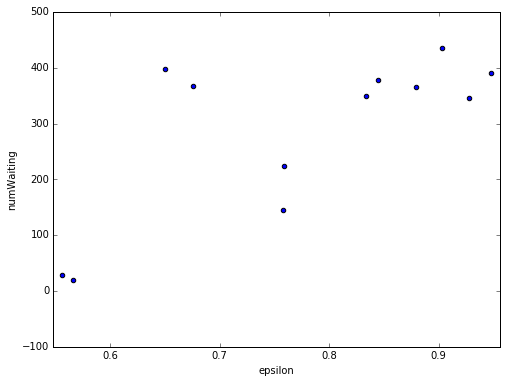

In [134]:
scatterPlot('epsilon', 'numWaiting', results)

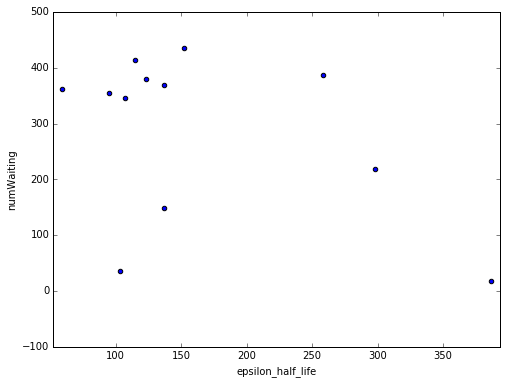

In [135]:
scatterPlot('epsilon_half_life', 'numWaiting', results)